# Analyze Covid-19 Dataset with Pandas & Matplotlib

### Step 1 - Downloading Data

In [14]:
import requests

resp = requests.get('https://pomber.github.io/covid19/timeseries.json')
data = resp.json()

In [15]:
import json 
import pandas as pd

# US, China, Italy, Iran
iran = pd.read_json(json.dumps(data['Iran']))
italy = pd.read_json(json.dumps(data['Italy']))
us = pd.read_json(json.dumps(data['US']))
china = pd.read_json(json.dumps(data['China']))
spain = pd.read_json(json.dumps(data['Spain']))
germany = pd.read_json(json.dumps(data['Germany']))
france = pd.read_json(json.dumps(data['France']))

world = italy.copy()
world['deaths'] = world['deaths'] + us['deaths'] + spain['deaths'] + germany['deaths'] + france['deaths']
world['confirmed'] = world['confirmed'] + us['confirmed'] + spain['confirmed'] + germany['confirmed'] + france['confirmed']

iran

date  confirmed  deaths  recovered
0  2020-01-22          0       0          0
1  2020-01-23          0       0          0
2  2020-01-24          0       0          0
3  2020-01-25          0       0          0
4  2020-01-26          0       0          0
..        ...        ...     ...        ...
75 2020-04-06      60500    3739      24236
76 2020-04-07      62589    3872      27039
77 2020-04-08      64586    3993      29812
78 2020-04-09      66220    4110      32309
79 2020-04-10      68192    4232      35465

[80 rows x 4 columns]

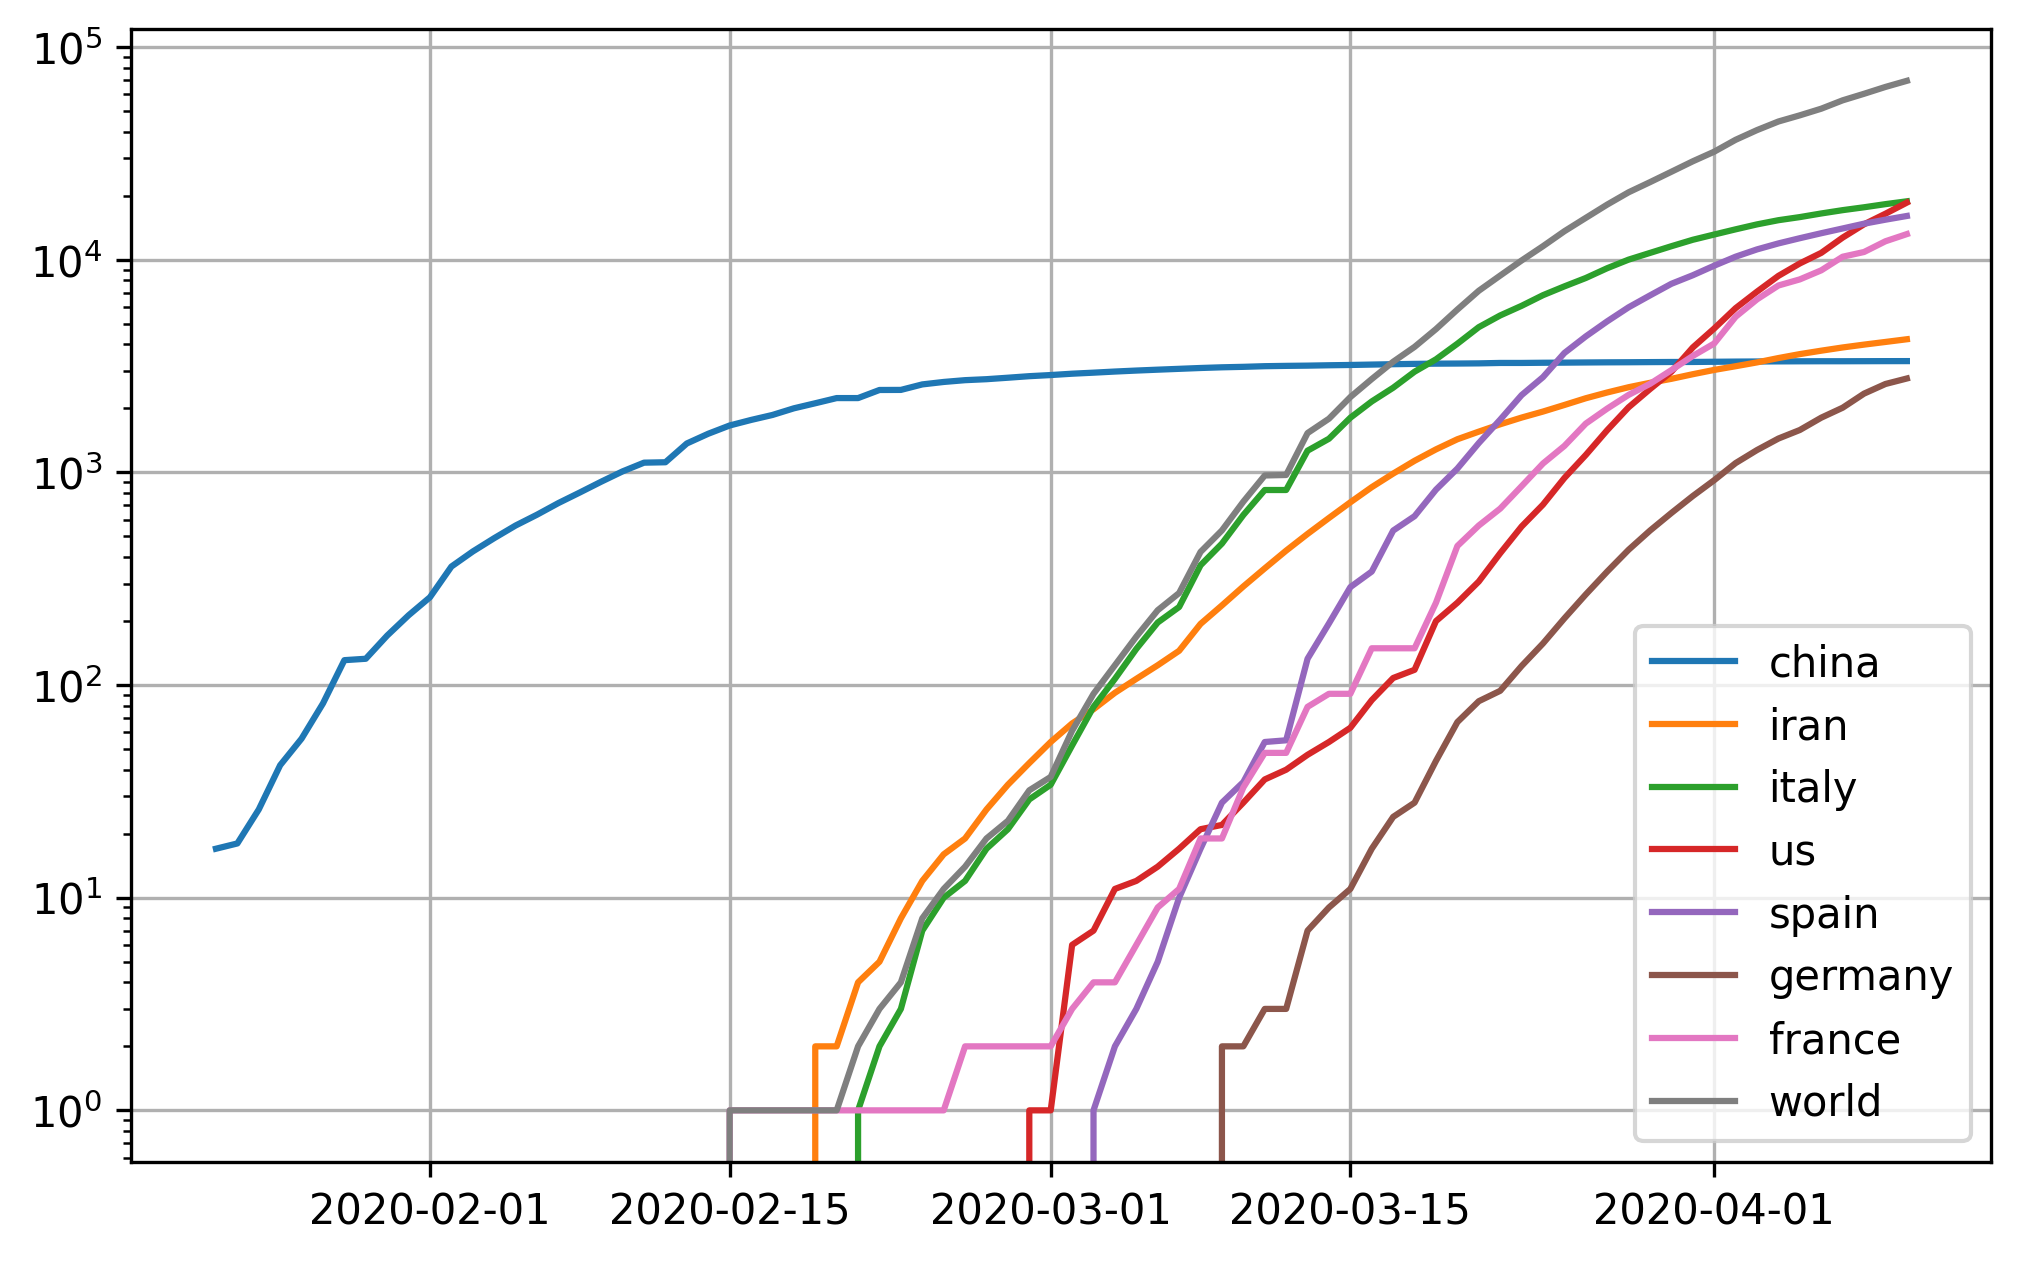

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5), dpi=300)

plt.plot(china.date, china.deaths, label='china')
plt.plot(iran.date, iran.deaths, label='iran')
plt.plot(italy.date, italy.deaths, label='italy')
plt.plot(us.date, us.deaths, label='us')
plt.plot(spain.date, spain.deaths, label='spain')
plt.plot(germany.date, germany.deaths, label='germany')
plt.plot(france.date, france.deaths, label='france')
plt.plot(world.date, world.deaths, label='world')

plt.yscale("log")
plt.grid()
plt.legend()
plt.show()

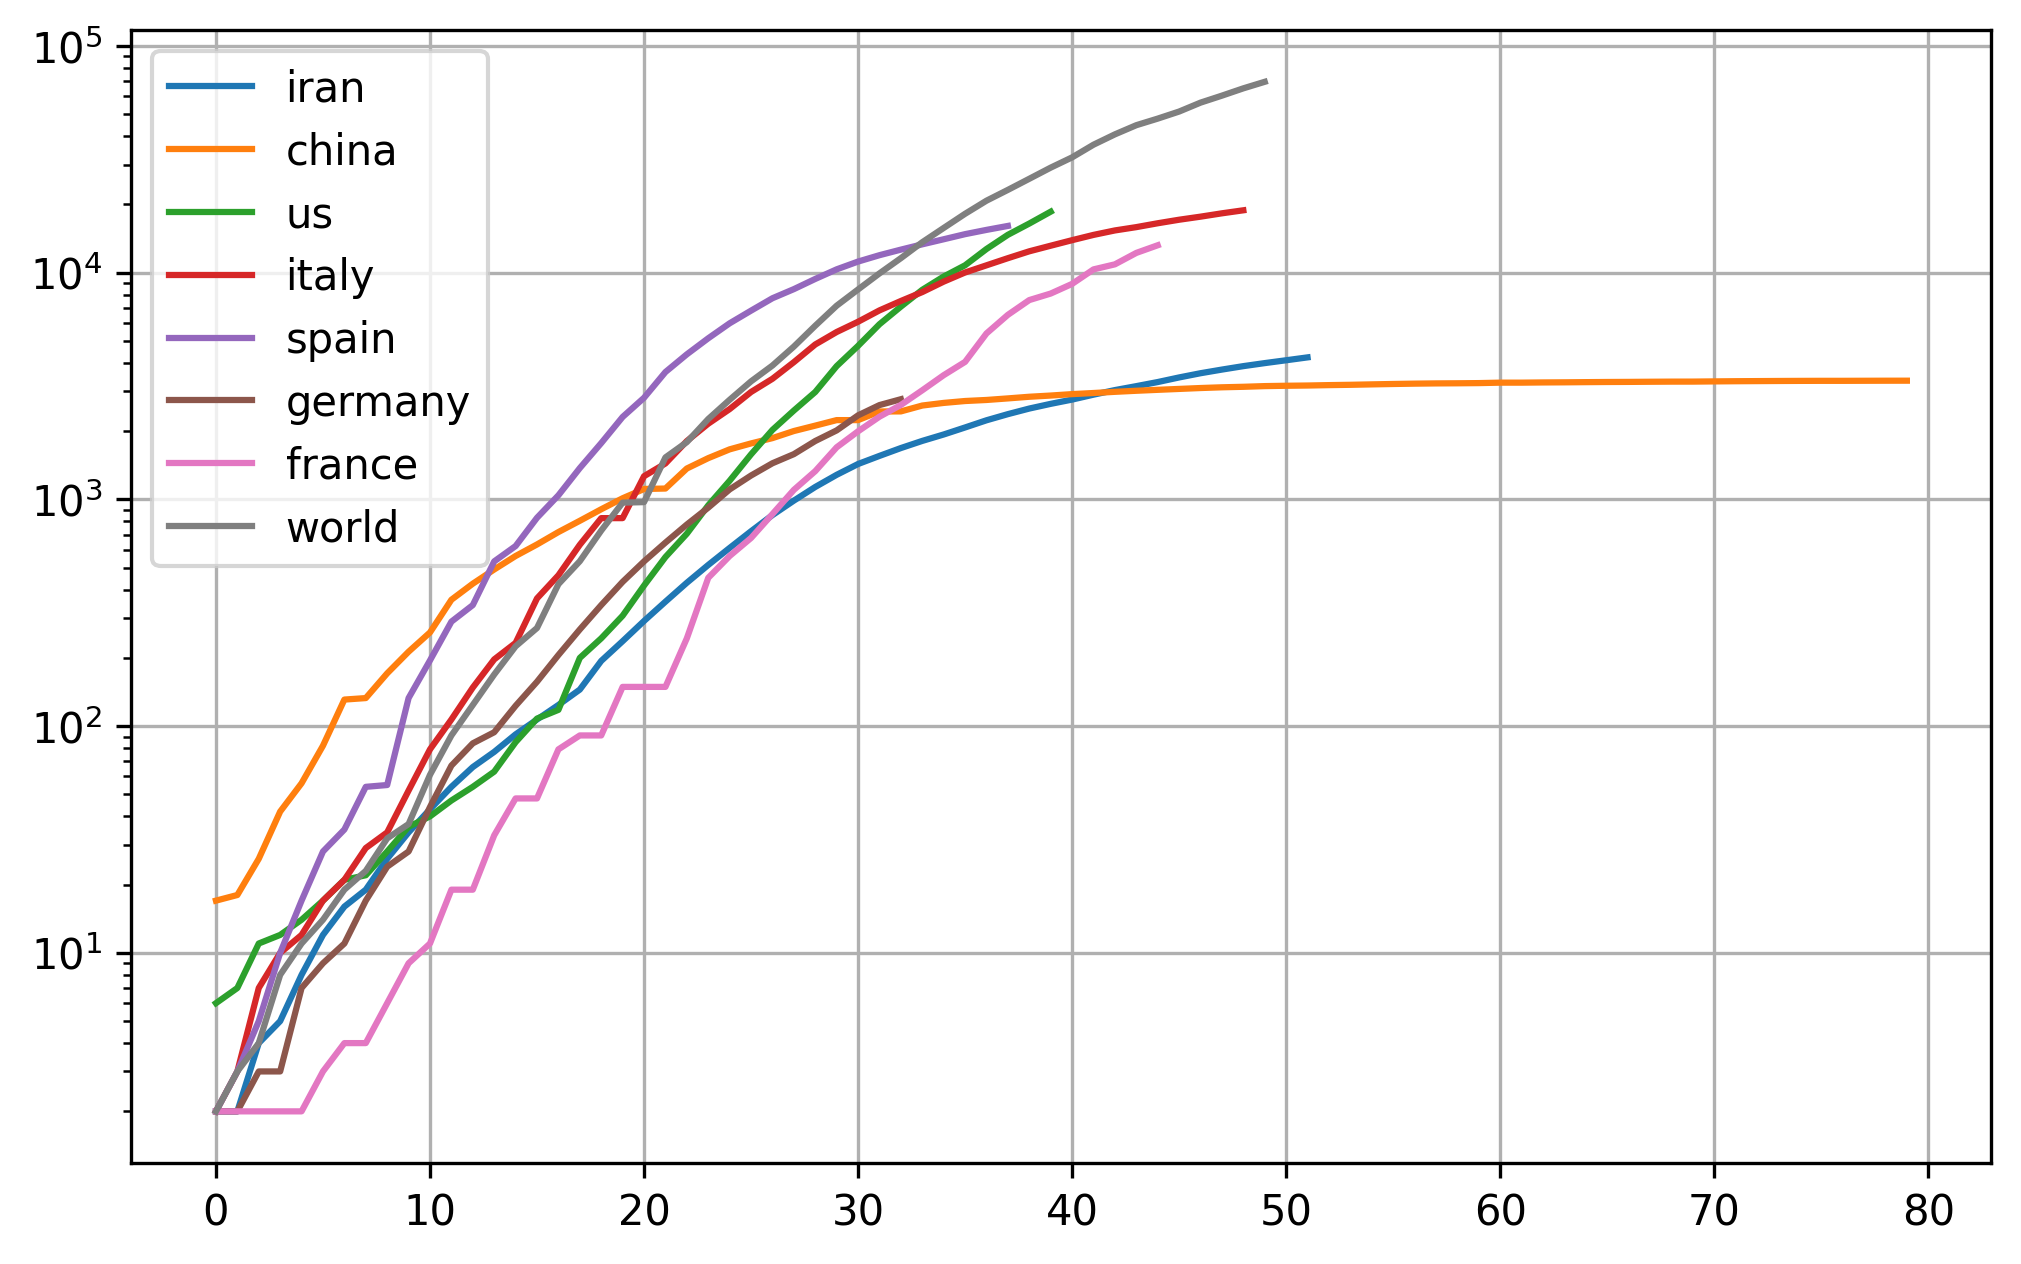

In [17]:
iran = iran[iran['deaths'] > 1].reset_index(drop=True)
italy = italy[italy['deaths'] > 1].reset_index(drop=True)
us = us[us['deaths'] > 1].reset_index(drop=True)
spain = spain[spain['deaths'] > 1].reset_index(drop=True)
germany = germany[germany['deaths'] > 1].reset_index(drop=True)
# turkey = turkey[turkey['confirmed'] > 10].reset_index(drop=True)
france = france[france['deaths'] > 1].reset_index(drop=True)
world = world[world['deaths'] > 1].reset_index(drop=True)

plt.figure(figsize=(8, 5), dpi=300)

plt.plot(iran.index, iran.deaths, label='iran')
plt.plot(china.index, china.deaths, label='china')
plt.plot(us.index, us.deaths, label='us')
plt.plot(italy.index, italy.deaths, label='italy')
plt.plot(spain.index, spain.deaths, label='spain')
plt.plot(germany.index, germany.deaths, label='germany')
plt.plot(france.index, france.deaths, label='france')
plt.plot(world.index, world.deaths, label='world')

plt.yscale("log")
plt.grid()
plt.legend()
plt.show()

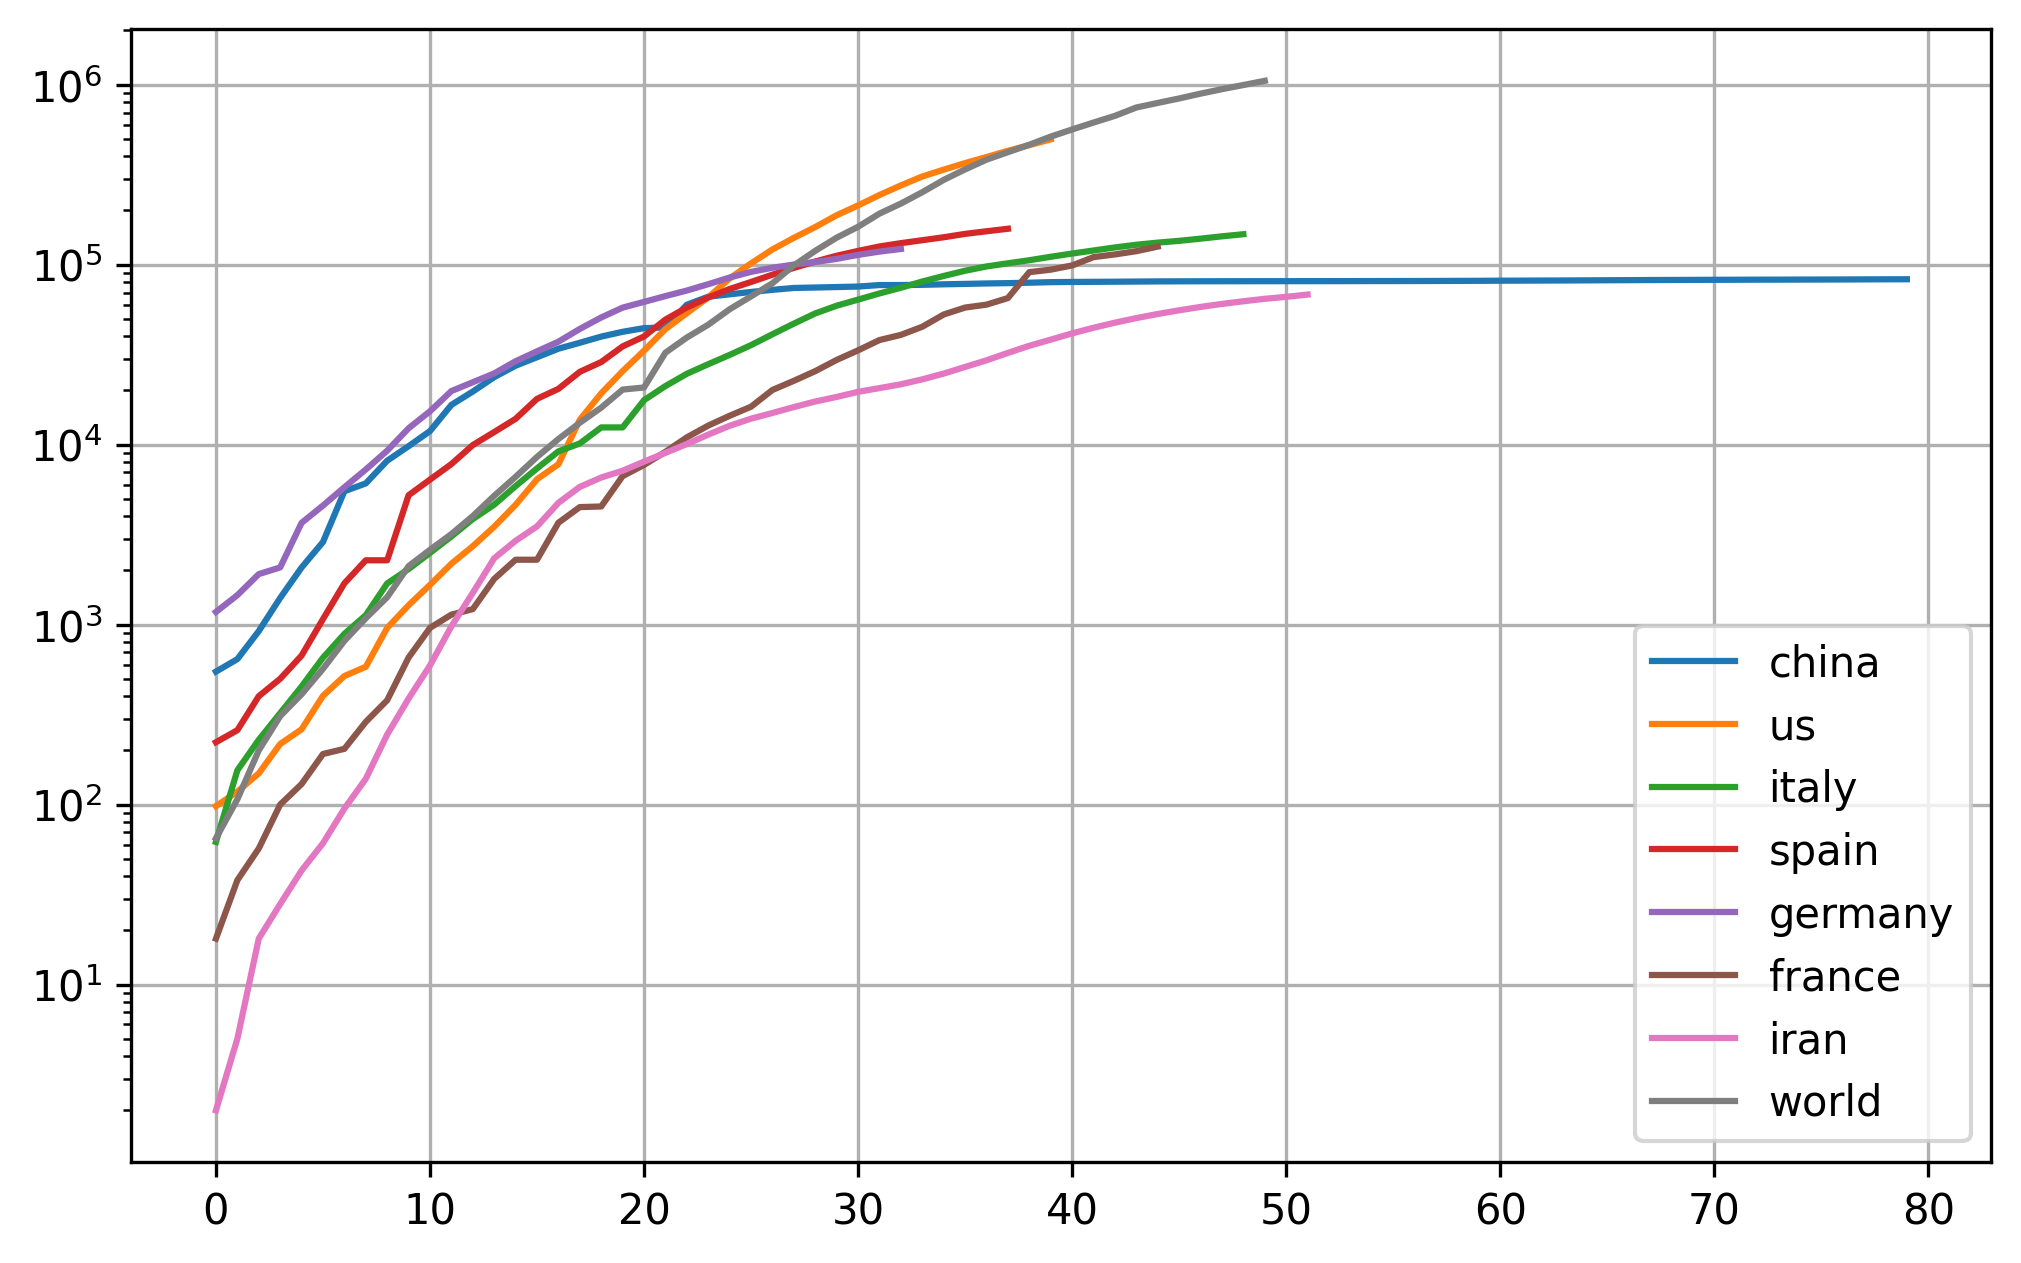

In [18]:
plt.figure(figsize=(8, 5), dpi=300)

plt.plot(china.index, china.confirmed, label='china')
plt.plot(us.index, us.confirmed, label='us')
plt.plot(italy.index, italy.confirmed, label='italy')
plt.plot(spain.index, spain.confirmed, label='spain')
plt.plot(germany.index, germany.confirmed, label='germany')
plt.plot(france.index, france.confirmed, label='france')
plt.plot(iran.index, iran.confirmed, label='iran')
plt.plot(world.index, world.confirmed, label='world')

plt.yscale("log")
plt.grid()
plt.legend()
plt.show()

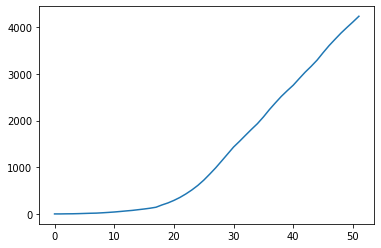

In [19]:
plt.plot(iran.index, iran.deaths)

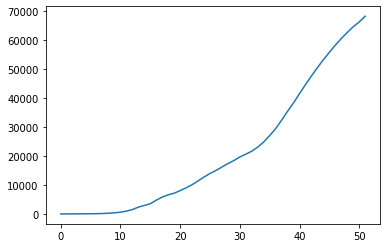

In [20]:
plt.plot(iran.index, iran.confirmed)

### Step 2 - Growth rate

In [21]:
def growth_rate(country):
    country.loc[0, 'growth_rate_deaths'] = 0
    country.loc[0, 'growth_rate_confirmed'] = 0
    for i in range(1, len(country)):
        country.loc[i, 'growth_rate_deaths'] = country.loc[i, 'deaths'] / country.loc[i - 1, 'deaths']
        country.loc[i, 'growth_rate_confirmed'] = country.loc[i, 'confirmed'] / country.loc[i - 1, 'confirmed']

date  confirmed  deaths  recovered  growth_rate_deaths  \
0  2020-02-19          2       2          0            0.000000   
1  2020-02-20          5       2          0            1.000000   
2  2020-02-21         18       4          0            2.000000   
3  2020-02-22         28       5          0            1.250000   
4  2020-02-23         43       8          0            1.600000   
5  2020-02-24         61      12          0            1.500000   
6  2020-02-25         95      16          0            1.333333   
7  2020-02-26        139      19         49            1.187500   
8  2020-02-27        245      26         49            1.368421   
9  2020-02-28        388      34         73            1.307692   
10 2020-02-29        593      43        123            1.264706   
11 2020-03-01        978      54        175            1.255814   
12 2020-03-02       1501      66        291            1.222222   
13 2020-03-03       2336      77        291            1.166667   
14 2020-03-04       2922      92        552            1.194805   
15 2020-03-05       3513     107        739            1.163043   
16 2020-03-06       4747     124        913            1.158879   
17 2020-03-07       5823     145       1669            1.169355   
18 2020-03-08       6566     194       2134            1.337931   
19 2020-03-09       7161     237       2394            1.221649   
20 2020-03-10       8042     291       2731            1.227848   
21 2020-03-11       9000     354       2959            1.216495   
22 2020-03-12      10075     429       2959            1.211864   
23 2020-03-13      11364     514       2959            1.198135   
24 2020-03-14      12729     611       2959            1.188716   
25 2020-03-15      13938     724       4590            1.184943   
26 2020-03-16      14991     853       4590            1.178177   
27 2020-03-17      16169     988       5389            1.158265   
28 2020-03-18      17361    1135       5389            1.148785   
29 2020-03-19      18407    1284       5710            1.131278   
30 2020-03-20      19644    1433       6745            1.116044   
31 2020-03-21      20610    1556       7635            1.085834   
32 2020-03-22      21638    1685       7931            1.082905   
33 2020-03-23      23049    1812       7931            1.075371   
34 2020-03-24      24811    1934       8913            1.067329   
35 2020-03-25      27017    2077       9625            1.073940   
36 2020-03-26      29406    2234      10457            1.075590   
37 2020-03-27      32332    2378      11133            1.064458   
38 2020-03-28      35408    2517      11679            1.058452   
39 2020-03-29      38309    2640      12391            1.048868   
40 2020-03-30      41495    2757      13911            1.044318   
41 2020-03-31      44605    2898      14656            1.051143   
42 2020-04-01      47593    3036      15473            1.047619   
43 2020-04-02      50468    3160      16711            1.040843   
44 2020-04-03      53183    3294      17935            1.042405   
45 2020-04-04      55743    3452      19736            1.047966   
46 2020-04-05      58226    3603      19736            1.043743   
47 2020-04-06      60500    3739      24236            1.037746   
48 2020-04-07      62589    3872      27039            1.035571   
49 2020-04-08      64586    3993      29812            1.031250   
50 2020-04-09      66220    4110      32309            1.029301   
51 2020-04-10      68192    4232      35465            1.029684   

    growth_rate_confirmed  
0                0.000000  
1                2.500000  
2                3.600000  
3                1.555556  
4                1.535714  
5                1.418605  
6                1.557377  
7                1.463158  
8                1.762590  
9                1.583673  
10               1.528351  
11               1.649241  
12               1.534765  
13               1.556296  
14               1.250856  
15       

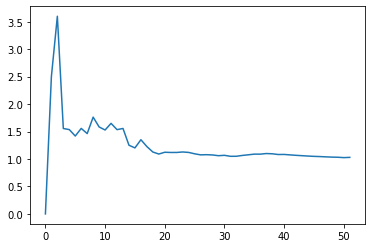

In [22]:
growth_rate(iran)
growth_rate(italy)
growth_rate(china)
growth_rate(us)
plt.plot(iran.index, iran.growth_rate_confirmed)
iran

### Step 3 - Estimation

In [23]:
deaths_growth = italy['growth_rate_deaths'][-10:].mean()
2467 * deaths_growth**60

30115.1010985507